In [131]:
import agentpy as ap
import matplotlib.pyplot as plt
import IPython

In [132]:
class Roundabout:
    def __init__(self, ratio, x_center, y_center):
        self.ratio = ratio
        self.x_center = x_center
        self.y_center = y_center
     
    def drawTR(self):
        x = self.ratio
        y = 0
        P = 1 - self.ratio
        
        cords = []
        while x > y:
            y += 1
            if P <= 0:
                P = P + 2 * y + 1
            else:        
                x -= 1
                P = P + 2 * y - 2 * x + 1
            if (x < y):
                break
        
            cords.append((-x + self.x_center, y + self.y_center))
            
            if x != y:
                cords.append((-y + self.x_center, x + self.y_center))
                
        return cords
  
    def drawBR(self):
        x = self.ratio
        y = 0
        P = 1 - self.ratio
        
        cords = []
        while x > y:
            y += 1
            if P <= 0:
                P = P + 2 * y + 1
            else:        
                x -= 1
                P = P + 2 * y - 2 * x + 1
            if (x < y):
                break
        
            cords.append((x + self.x_center, y + self.y_center))
            
            if x != y:
                cords.append((y + self.x_center, x + self.y_center))
                
        return cords
    
    def drawBL(self):
        x = self.ratio
        y = 0
        P = 1 - self.ratio
        
        cords = []
        while x > y:
            y += 1
            if P <= 0:
                P = P + 2 * y + 1
            else:        
                x -= 1
                P = P + 2 * y - 2 * x + 1
            if (x < y):
                break
        
            cords.append((x + self.x_center, -y + self.y_center))
            
            if x != y:
                cords.append((y + self.x_center, -x + self.y_center))
                
        return cords

    def drawTL(self):
        x = self.ratio
        y = 0
        P = 1 - self.ratio
        
        cords = []
        while x > y:
            y += 1
            if P <= 0:
                P = P + 2 * y + 1
            else:        
                x -= 1
                P = P + 2 * y - 2 * x + 1
            if (x < y):
                break
        
            cords.append((-x + self.x_center, -y + self.y_center))
            
            if x != y:
                cords.append((-y + self.x_center, -x + self.y_center))
                
        return cords
 

In [133]:
class Road:
  def __init__(self, ratio, x_center, y_center, bp, ep):
      self.ratio = ratio
      self.x_center = x_center
      self.y_center = y_center
      self.bp = bp
      self.ep = ep
  
  def drawbottom(self):
    POSITIONS_DB = []
    for i in range(16,27):
      POSITIONS_DB.append((i,13))
    return POSITIONS_DB

  def drawtop(self):
    POSITIONS_DT = []
    for i in range(0,11):
      POSITIONS_DT.append((i,13))
    return POSITIONS_DT

  def drawright(self):
    POSITIONS_DR = []
    for i in range(16,27):
      POSITIONS_DR.append((13,i))
    return POSITIONS_DR

  def drawleft(self):
    POSITIONS_DL = []
    for i in range(0,11):
      POSITIONS_DL.append((i,13))
    return POSITIONS_DL

#POSITIONS
  def drawBG(self):
    POSITIONS_BG = []
    #dibujar posiciones del background
    POSITIONS_BG += (self.drawbottom())
    POSITIONS_BG += (self.drawleft())
    POSITIONS_BG += (self.drawright())
    POSITIONS_BG += (self.drawtop())
    POSITIONS_BG += rab.drawBL() + rab.drawBR() + rab.drawTL() + rab.drawTR()
    return POSITIONS_BG

  
  def drawRD(self):
    # POSSIBLE_TARGETS = [(26,13), (13,26),  (0,13), (13,0)]
    POSITIONS = []

    #primera salida: 13, 26
    #2nda salida: 0,13
    #3era salida: 13,0

    rab = Roundabout(self.ratio, self.x_center, self.y_center) #falta acceder a las partes de la rotonda
    #checar por donde viene y qué dibuja depende del bp y ep

    #SI SALE DE ABAJO
    if self.bp[0] == 26 and self.bp[1] == 13:
      POSITIONS += self.drawbottom()
      POSITIONS += rab.drawBR()
      POSITIONS.append((13,16))

      if self.ep[0] == 13 and self.ep[1] == 26:
        POSITIONS += self.drawright()

      elif self.ep[0] == 0 and self.ep[1] == 13:
        POSITIONS += self.drawtop()
        POSITIONS += rab.drawTR()
        POSITIONS.append((10,13))
      
      elif self.ep[0] == 13 and self.ep[1] == 0:
        POSITIONS += self.drawleft()
        POSITIONS += rab.drawTR() + rab.drawTL()
        POSITIONS.append((10,13))
        POSITIONS.append((13,10))
        
    #SI SALE DE LA DERECHA
    elif self.bp[0] == 13 and self.bp[1] == 26:
      POSITIONS += self.drawright()
      POSITIONS+=rab.drawTR()
      POSITIONS.append((10,13))

      if self.ep[0] == 0 and self.ep[1] == 13:
        POSITIONS += self.drawtop()

      elif self.ep[0] == 13 and self.ep[1] == 0:
        POSITIONS += self.drawleft()
        POSITIONS += rab.drawTL()
        POSITIONS.append((13,10))

      elif self.ep[0] == 26 and self.ep[1] == 13:
        POSITIONS += self.drawbottom()
        POSITIONS+=rab.drawTL() + rab.drawBL()
        POSITIONS.append((13,10))
        POSITIONS.append((16,13))

    #SI SALE DE ARRIBA
    elif self.bp[0] == 0 and self.bp[1] == 13:
      POSITIONS += self.drawtop()
      POSITIONS+=rab.drawTL()
      POSITIONS.append((13,10))

      if self.ep[0] == 13 and self.ep[1] == 0:
        POSITIONS += self.drawleft()
          
      elif self.ep[0] == 26 and self.ep[1] == 13:
        POSITIONS += self.drawbottom()
        POSITIONS += rab.drawBL()
        POSITIONS.append((16,13))

      elif self.ep[0] == 13 and self.ep[1] == 26:
        POSITIONS += self.drawright()
        POSITIONS += rab.drawBL() + rab.drawBR()
        POSITIONS.append((16,13))
        POSITIONS.append((13,16))
    
    #SI SALE DE IZQ
    elif self.bp[0] == 13 and self.bp[1] == 0:
      POSITIONS += self.drawleft()
      POSITIONS+=rab.drawBL()
      POSITIONS.append((16,13))

      if self.ep[0] == 26 and self.ep[1] == 13:
        POSITIONS += self.drawbottom()

      elif self.ep[0] == 13 and self.ep[1] == 26:
        POSITIONS += self.drawright()
        POSITIONS+=rab.drawBR()
        POSITIONS.append((13,16))

      elif self.ep[0] == 0 and self.ep[1] == 13:
        POSITIONS += self.drawtop()
        POSITIONS+=rab.drawBR()+rab.drawTR()
        POSITIONS.append((13,16))
        POSITIONS.append((0,13))
  
    return POSITIONS


In [134]:
# Road agent positions
'''
POSITIONS_X = []
POSITIONS_Y = []
POSITIONS_BG = []

rab = Roundabout(3, 13, 13)

for i in range(0, 11):
    POSITIONS_X.append((13,i))
    POSITIONS_Y.append((i,13))
    
for i in range(16, 27):
    POSITIONS_X.append((13,i))
    POSITIONS_Y.append((i,13))

#POSITIONS_X = POSITIONS_X + rab.drawTL() + rab.drawTR()
#POSITIONS_X.append((10,13))

#POSITIONS_Y = POSITIONS_Y + rab.drawBR() + rab.drawTR()
#POSITIONS_Y.append((13,16))

POSITIONS_BG = rab.drawBL() + rab.drawBR()
'''

'\nPOSITIONS_X = []\nPOSITIONS_Y = []\nPOSITIONS_BG = []\n\nrab = Roundabout(3, 13, 13)\n\nfor i in range(0, 11):\n    POSITIONS_X.append((13,i))\n    POSITIONS_Y.append((i,13))\n    \nfor i in range(16, 27):\n    POSITIONS_X.append((13,i))\n    POSITIONS_Y.append((i,13))\n\n#POSITIONS_X = POSITIONS_X + rab.drawTL() + rab.drawTR()\n#POSITIONS_X.append((10,13))\n\n#POSITIONS_Y = POSITIONS_Y + rab.drawBR() + rab.drawTR()\n#POSITIONS_Y.append((13,16))\n\nPOSITIONS_BG = rab.drawBL() + rab.drawBR()\n'

In [135]:
class multiAgentTraffic(ap.Model):
    def setup(self):
        
        # Create agents
        self.cars = ap.AgentList(self,2)

        road = Road(5, 13, 13, 26, 0)
        roadBG=ap.AgentList(self,len(road.drawBG()))
        
        ROADS = []
        road_agents = []
        bpoints = [(26,13), (13,26)]
        epoints = [(0,13), (26,13)]
        
        cars = self.cars
        i = 0
        

        
        for car in cars:
            #print(i)
            ROADS[i].append(Road(5,13,13,bpoints[i],epoints[i]))
            road_agents[i].append(ap.AgentList(self,len(ROADS[i].drawRoad())))
            i += 1
        

        #roadX=ap.AgentList(self,len(POSITIONS_X))
        #roadY=ap.AgentList(self,len(POSITIONS_Y))
        #roadBG=ap.AgentList(self,len(POSITIONS_BG))

        # Create grid
        self.city = ap.Grid(self, [self.p.size] * 2, track_empty=True)
        self.city.add_agents(self.cars, [bpoints[0],bpoints[1]])
        self.city.add_agents(roadBG, positions=road.drawBG() ,empty=False)
        self.city.add_agents(road_agents[0], positions=ROADS[0], empty=False)
        self.city.add_agents(road_agents[1], positions=ROADS[1], empty=False)

        # Agent type attribute
    
        #0: untravelled road
        #1: travelled road
        #2: car 0
        #3: car 1
        
        road_agents[0].type_agent = 0
        road_agents[1].type_agent = 0
        roadBG.type_agent = 0
        
        self.cars[0].type_agent = 2
        self.cars[1].type_agent = 3

        # Road direction attribute
        #0: is vertical
        #1: is horizontal
        road[0].road_direction = 0
        road[1].road_direction = 1
        roadBG.road_direction = 2

    def step(self):
        cars = self.cars

        for car in cars:
            for neighbor in self.city.neighbors(car):
                new_position = self.city.positions[neighbor]
                if car.type_agent == 2 and neighbor.road_direction == 0 and neighbor.type_agent == 0:
                    self.city.move_to(car, new_position)
                    neighbor.type_agent == 1
                    break

                elif car.type_agent == 3 and neighbor.road_direction == 1 and neighbor.type_agent ==0:
                    self.city.move_to(car, new_position)
                    neighbor.type_agent == 1
                    break

IndexError: list index out of range

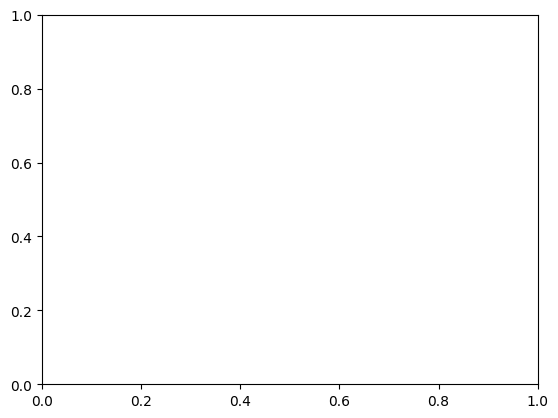

In [136]:
# Define parameters
parameters={
    'size':27,
    'steps':50,
}
# Create single-run animation with custom colors
def animation_plot (model, ax):
    attr_grid=model.city.attr_grid('type_agent')
    color_dict = {0:'#808080', 1:'#ADFFBF', 2: '#FF00FF',3:'#0000FF', None: '#497a41'}
    ap.gridplot (attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Traffic simulation\n"
    f"Time-step: {moRdel.t}")
fig, ax = plt. subplots()

model = multiAgentTraffic(parameters)

animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))